In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm
import openpyxl
from sklearn.linear_model import LinearRegression

In [28]:
file_path = r'C:\Users\User\Downloads/chevron_refinery_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,Month,Crude Oil Input (barrels),Labor Hours,Energy Input (MMBtu),Gasoline Output (barrels),Diesel Output (barrels),Petrochemicals Output (tons),Crude Oil Cost ($/barrel),Natural Gas Cost ($/MMBtu),Labor Cost ($/hour)
0,Jan,2000000,80000,700000,1100000,600000,400,75,3.50,25.0
1,Feb,2100000,85000,710000,1120000,620000,410,80,3.60,25.5
2,Mar,1950000,78000,680000,1050000,580000,390,70,3.40,24.5
3,Apr,2050000,82000,705000,1090000,610000,405,78,3.55,25.0
4,May,2200000,88000,720000,1150000,640000,415,85,3.65,26.0


In [29]:
df.describe()

,Crude Oil Input (barrels),Labor Hours,Energy Input (MMBtu),Gasoline Output (barrels),Diesel Output (barrels),Petrochemicals Output (tons),Crude Oil Cost ($/barrel),Natural Gas Cost ($/MMBtu),Labor Cost ($/hour)
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.075000e+06,83166.666667,705000.000000,1.106667e+06,613333.333333,405.000000,78.333333,3.550000,25.291667
std,9.354143e+04,3816.630276,14142.135624,3.502380e+04,21602.468995,8.944272,5.316641,0.089443,0.557150
min,1.950000e+06,78000.000000,680000.000000,1.050000e+06,580000.000000,390.000000,70.000000,3.400000,24.500000
25%,2.012500e+06,80500.000000,701250.000000,1.092500e+06,602500.000000,401.250000,75.750000,3.512500,25.000000
50%,2.075000e+06,83500.000000,707500.000000,1.110000e+06,615000.000000,407.500000,79.000000,3.575000,25.250000
75%,2.137500e+06,85750.000000,713750.000000,1.127500e+06,627500.000000,410.000000,81.500000,3.600000,25.687500
max,2.200000e+06,88000.000000,720000.000000,1.150000e+06,640000.000000,415.000000,85.000000,3.650000,26.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         6 non-null      object 
 1   Crude Oil Input (barrels)     6 non-null      int64  
 2   Labor Hours                   6 non-null      int64  
 3   Energy Input (MMBtu)          6 non-null      int64  
 4   Gasoline Output (barrels)     6 non-null      int64  
 5   Diesel Output (barrels)       6 non-null      int64  
 6   Petrochemicals Output (tons)  6 non-null      int64  
 7   Crude Oil Cost ($/barrel)     6 non-null      int64  
 8   Natural Gas Cost ($/MMBtu)    6 non-null      float64
 9   Labor Cost ($/hour)           6 non-null      float64
dtypes: float64(2), int64(7), object(1)
memory usage: 608.0+ bytes


In [31]:
#task 1
# Calculating Total Output (Gasoline + Diesel + Petrochemicals converted to barrels)
df['Total Output (barrels)'] = df['Gasoline Output (barrels)'] + df['Diesel Output (barrels)'] + df['Petrochemicals Output (tons)'] * 7.33  # Approx. tons to barrels conversion

# Function to calculate marginal product
def marginal_product(df, input_column, output_column):
    # Calculate the differences in inputs and outputs
    delta_input = df[input_column].diff()  # Change in input
    delta_output = df[output_column].diff()  # Change in output
    
    # Marginal product is the change in output divided by the change in input
    marginal_product = delta_output / delta_input
    
    return marginal_product

# Calculate the marginal product of Crude Oil, Labor, and Energy
df['MP_Crude_Oil'] = marginal_product(df, 'Crude Oil Input (barrels)', 'Total Output (barrels)')
df['MP_Labor'] = marginal_product(df, 'Labor Hours', 'Total Output (barrels)')
df['MP_Energy'] = marginal_product(df, 'Energy Input (MMBtu)', 'Total Output (barrels)')

# Display the resulting DataFrame with marginal products
df[['Month', 'Crude Oil Input (barrels)', 'Labor Hours', 'Energy Input (MMBtu)', 'Total Output (barrels)', 
    'MP_Crude_Oil', 'MP_Labor', 'MP_Energy']]

,Month,Crude Oil Input (barrels),Labor Hours,Energy Input (MMBtu),Total Output (barrels),MP_Crude_Oil,MP_Labor,MP_Energy
0,Jan,2000000,80000,700000,1702932.00,NaN,NaN,NaN
1,Feb,2100000,85000,710000,1743005.30,0.400733,8.014660,4.007330
2,Mar,1950000,78000,680000,1632858.70,0.734311,15.735229,3.671553
3,Apr,2050000,82000,705000,1702968.65,0.701099,17.527487,2.804398
4,May,2200000,88000,720000,1793041.95,0.600489,15.012217,6.004887
5,Jun,2150000,86000,715000,1763005.30,0.600733,15.018325,6.007330


In [32]:
# Display insights as part of the analysis
print("""
### Insights:

1. Diminishing Returns: 
   You can observe the point where increasing inputs start yielding lower marginal products, 
   which is indicative of diminishing returns. 
   For example, in May, crude oil input increased significantly, but the marginal product of crude oil 
   dropped to 0.600 barrels/barrel, implying that adding more crude oil isn't yielding proportionate output increases.

2. Energy Efficiency: 
   In May, the marginal product of energy was much higher (6 barrels/MMBtu), 
   showing that the refinery was more energy-efficient that month compared to others.
""")



### Insights:

1. Diminishing Returns: 
   You can observe the point where increasing inputs start yielding lower marginal products, 
   which is indicative of diminishing returns. 
   For example, in May, crude oil input increased significantly, but the marginal product of crude oil 
   dropped to 0.600 barrels/barrel, implying that adding more crude oil isn't yielding proportionate output increases.

2. Energy Efficiency: 
   In May, the marginal product of energy was much higher (6 barrels/MMBtu), 
   showing that the refinery was more energy-efficient that month compared to others.



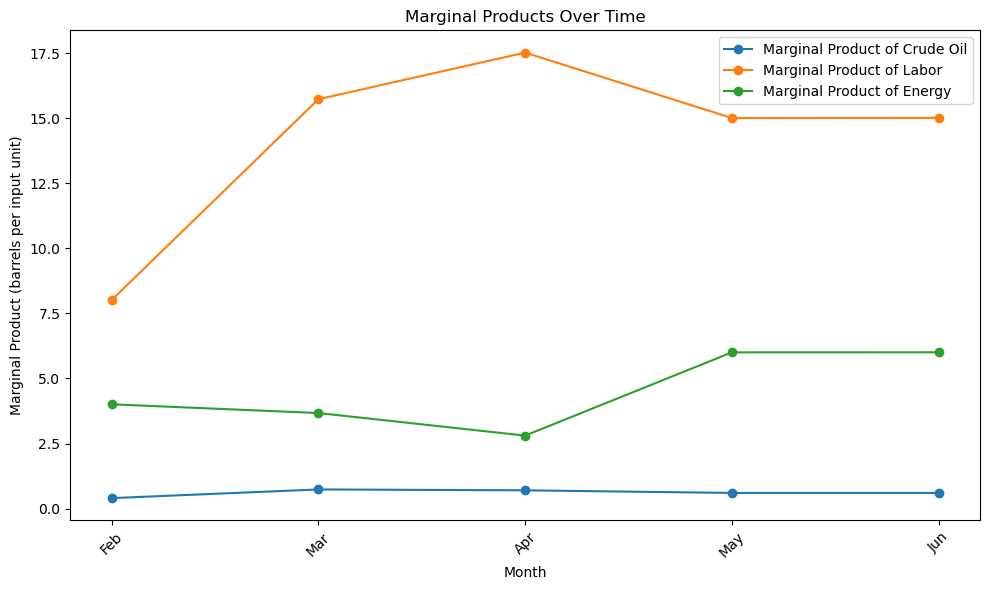

Correlation Matrix between Input Prices and Marginal Products:

                            Crude Oil Cost ($/barrel)  \
Crude Oil Cost ($/barrel)                    1.000000   
Natural Gas Cost ($/MMBtu)                   0.988361   
Labor Cost ($/hour)                          0.973386   
MP_Crude_Oil                                -0.510966   
MP_Labor                                    -0.194281   
MP_Energy                                    0.679742   

                            Natural Gas Cost ($/MMBtu)  Labor Cost ($/hour)  \
Crude Oil Cost ($/barrel)                     0.988361             0.973386   
Natural Gas Cost ($/MMBtu)                    1.000000             0.953183   
Labor Cost ($/hour)                           0.953183             1.000000   
MP_Crude_Oil                                 -0.607414            -0.570810   
MP_Labor                                     -0.300281            -0.289987   
MP_Energy                                     0.585990        

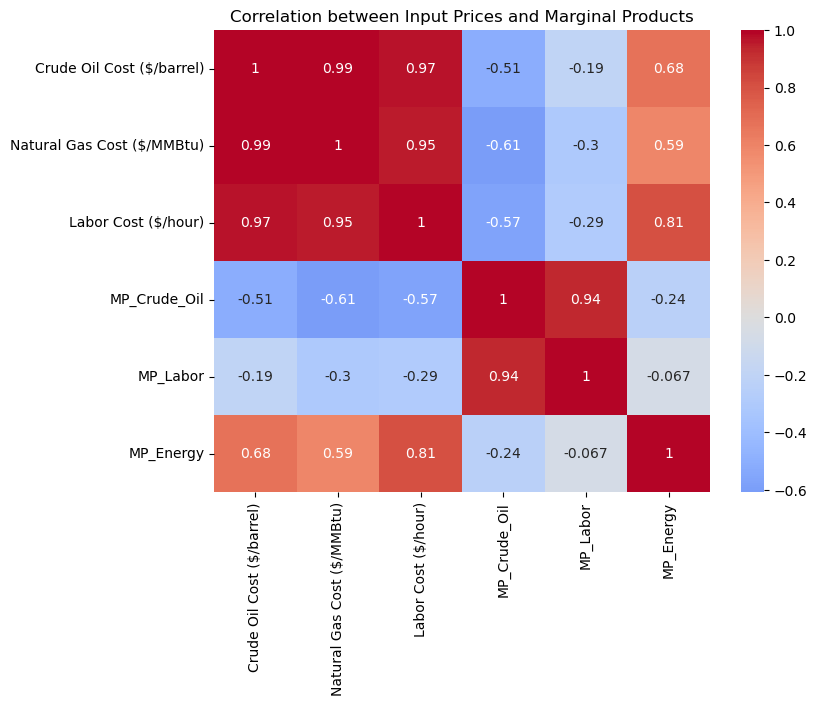

In [33]:
# 1. Visualize Marginal Products over Time
plt.figure(figsize=(10, 6))

# Plot each marginal product
plt.plot(df['Month'], df['MP_Crude_Oil'], label='Marginal Product of Crude Oil', marker='o')
plt.plot(df['Month'], df['MP_Labor'], label='Marginal Product of Labor', marker='o')
plt.plot(df['Month'], df['MP_Energy'], label='Marginal Product of Energy', marker='o')

# Adding titles and labels
plt.title('Marginal Products Over Time')
plt.xlabel('Month')
plt.ylabel('Marginal Product (barrels per input unit)')
plt.legend()

# Rotate month labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# 2. Correlation Analysis between Input Prices and Marginal Products
# We use Pearson correlation to find the relationships
correlation_matrix = df[['Crude Oil Cost ($/barrel)', 'Natural Gas Cost ($/MMBtu)', 'Labor Cost ($/hour)', 
                         'MP_Crude_Oil', 'MP_Labor', 'MP_Energy']].corr()

# Print correlation matrix
print("Correlation Matrix between Input Prices and Marginal Products:\n")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Input Prices and Marginal Products')
plt.show()


In [34]:
print("""
### Key Insights from the Correlation Matrix:

1. **Crude Oil Cost and Marginal Products**:
   - **Negative Correlation with MP_Crude_Oil**: The correlation between crude oil cost and its marginal product (MP_Crude_Oil) is **-0.51**. This indicates that as crude oil prices increase, the refinery's efficiency in producing output from additional barrels of crude oil decreases. Essentially, higher crude oil prices lead to diminishing returns in crude oil input efficiency.
   - **Positive Correlation with MP_Energy**: There is a **positive correlation (0.68)** between crude oil cost and MP_Energy, meaning that when crude oil prices rise, energy inputs are used more efficiently. This could indicate a shift in focus to optimize energy use when crude oil becomes more expensive.

2. **Natural Gas Cost and Marginal Products**:
   - **Negative Correlation with MP_Crude_Oil**: The correlation between natural gas cost (energy) and MP_Crude_Oil is **-0.61**, showing that as natural gas prices increase, the efficiency of crude oil inputs declines. This suggests an indirect effect where higher energy costs make it less efficient to utilize crude oil for production.
   - **Moderate Positive Correlation with MP_Energy**: A **moderate positive correlation (0.59)** between natural gas cost and MP_Energy suggests that when energy costs increase, the marginal product of energy also increases. This could imply that higher energy prices lead to a more judicious or optimized use of energy inputs.

3. **Labor Cost and Marginal Products**:
   - **Weak Negative Correlation with MP_Labor**: The correlation between labor cost and MP_Labor is **-0.29**, indicating that as labor costs increase, the marginal product of labor decreases slightly. This means that labor becomes less efficient when its cost rises, although the relationship is not particularly strong.
   - **Strong Positive Correlation with MP_Energy**: There is a **strong positive correlation (0.81)** between labor cost and MP_Energy, suggesting that as labor costs increase, the refinery compensates by using energy more efficiently. This may indicate a shift towards energy-intensive processes as labor becomes more expensive.

---

### Main Insights:

1. **Diminishing Returns from Crude Oil**:
   - As crude oil prices increase, the marginal product of crude oil decreases, reflecting **diminishing returns** from this input. The refinery becomes less efficient at converting additional barrels of crude oil into output when prices are high.

2. **Energy Efficiency Increases with Rising Input Prices**:
   - Both crude oil and natural gas prices are positively correlated with the **marginal product of energy**. This indicates that when input prices rise (particularly crude oil), the refinery shifts focus to improve energy efficiency, possibly due to cost-saving measures or process adjustments.

3. **Labor and Energy Substitution**:
   - The strong positive correlation between labor cost and MP_Energy suggests that the refinery relies more heavily on energy efficiency when labor costs rise. This could indicate a **substitution effect** where higher labor costs lead to increased reliance on energy to maintain output levels.

---

### Actionable Insights for Chevron:

1. **Monitor Crude Oil Prices**:
   - As crude oil prices increase, the refinery should anticipate diminishing returns on crude oil input and seek strategies to optimize crude oil use or shift reliance to other inputs.

2. **Energy Optimization**:
   - Higher energy prices seem to drive better energy efficiency, suggesting that ongoing improvements in energy management could offset rising crude oil and labor costs.

3. **Labor and Process Efficiency**:
   - Rising labor costs reduce the efficiency of labor inputs. Automation or energy-intensive processes may become more attractive as labor becomes more expensive.

These insights highlight critical areas where Chevron can optimize resource use to maintain refinery productivity, especially when facing volatile input prices.
""")


### Key Insights from the Correlation Matrix:

1. **Crude Oil Cost and Marginal Products**:
   - **Negative Correlation with MP_Crude_Oil**: The correlation between crude oil cost and its marginal product (MP_Crude_Oil) is **-0.51**. This indicates that as crude oil prices increase, the refinery's efficiency in producing output from additional barrels of crude oil decreases. Essentially, higher crude oil prices lead to diminishing returns in crude oil input efficiency.
   - **Positive Correlation with MP_Energy**: There is a **positive correlation (0.68)** between crude oil cost and MP_Energy, meaning that when crude oil prices rise, energy inputs are used more efficiently. This could indicate a shift in focus to optimize energy use when crude oil becomes more expensive.

2. **Natural Gas Cost and Marginal Products**:
   - **Negative Correlation with MP_Crude_Oil**: The correlation between natural gas cost (energy) and MP_Crude_Oil is **-0.61**, showing that as natural gas prices incr

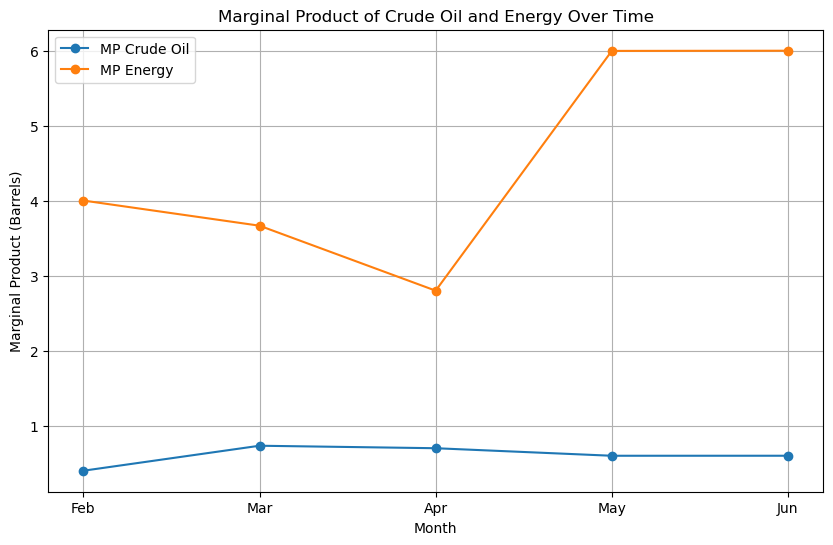

The optimal crude oil input before diminishing returns is 1950000 barrels.
Correlation between energy input and total output: 0.98
The optimal energy input before diminishing returns is 715000 MMBtu.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Task 2

# Plot Marginal Product of Crude Oil and Energy over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['MP_Crude_Oil'], label='MP Crude Oil', marker='o')
plt.plot(df['Month'], df['MP_Energy'], label='MP Energy', marker='o')
plt.title('Marginal Product of Crude Oil and Energy Over Time')
plt.xlabel('Month')
plt.ylabel('Marginal Product (Barrels)')
plt.legend()
plt.grid(True)
plt.show()

# 1. Investigate diminishing returns for crude oil:
# We look for the point where the MP of crude oil starts declining

# Find the maximum MP_Crude_Oil
max_mp_crude_index = df['MP_Crude_Oil'].idxmax()
optimal_crude_oil_input = df.loc[max_mp_crude_index, 'Crude Oil Input (barrels)']

print(f"The optimal crude oil input before diminishing returns is {optimal_crude_oil_input} barrels.")

# 2. Analyze energy efficiency impact
# We will compute the correlation between energy input and total output

correlation_energy_output = df['Energy Input (MMBtu)'].corr(df['Total Output (barrels)'])
print(f"Correlation between energy input and total output: {correlation_energy_output:.2f}")

# Check if there's diminishing returns for energy by comparing MP_Energy over time
diminishing_energy_index = df['MP_Energy'].idxmax()
optimal_energy_input = df.loc[diminishing_energy_index, 'Energy Input (MMBtu)']

print(f"The optimal energy input before diminishing returns is {optimal_energy_input} MMBtu.")


Correlation between Crude Oil Input and Energy Input: 0.94


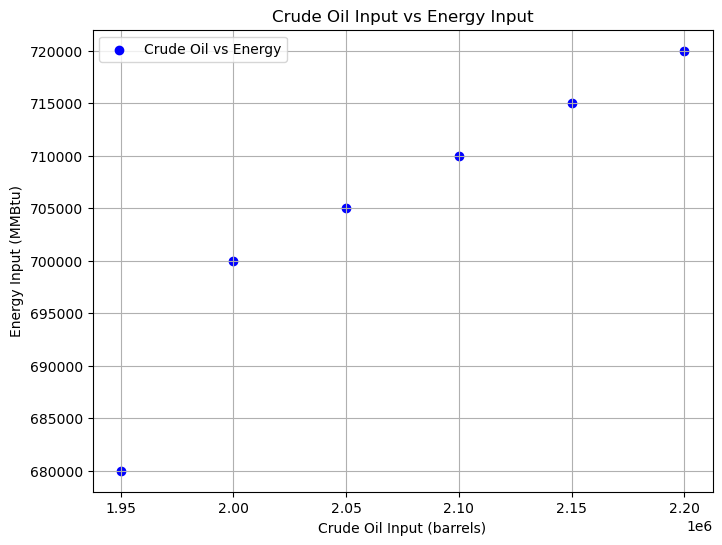

Correlation between Labor Hours and Energy Input: 0.94


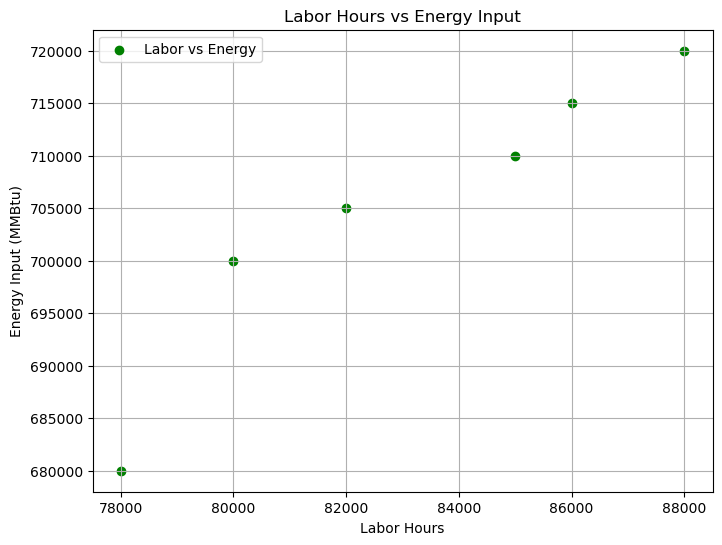

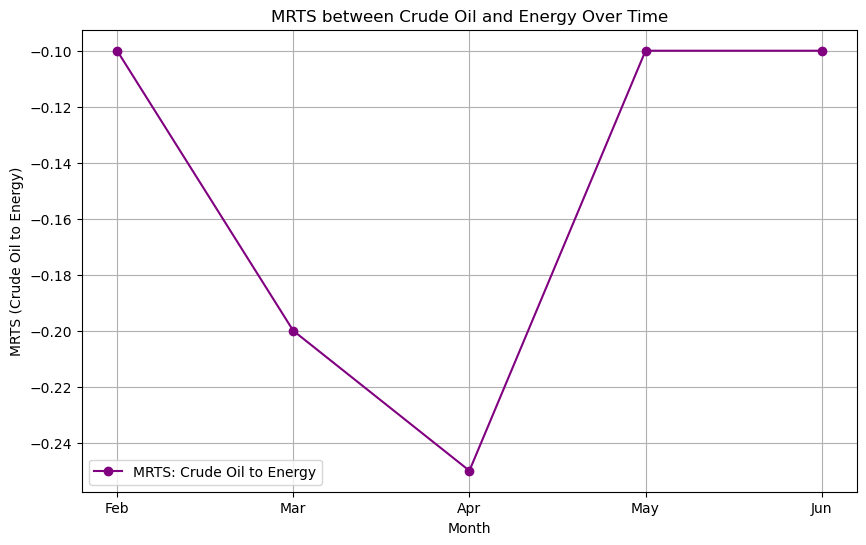


### Substitution Insights:
1. **Crude Oil and Energy Substitution**:
   - The correlation between crude oil input and energy input is 0.94.
   - A negative correlation would indicate that when crude oil input decreases, energy input increases, and vice versa, suggesting substitution between the two.

2. **Labor and Energy Substitution**:
   - The correlation between labor hours and energy input is 0.94.
   - A positive correlation would suggest that as labor usage increases, energy usage also increases, indicating complementary inputs, not substitution.
   
3. **Elasticity of Substitution (MRTS)**:
   - The Marginal Rate of Technical Substitution (MRTS) between crude oil and energy measures how many units of crude oil can be substituted by energy to maintain the same level of output.
   - The trend in MRTS over time shows how the refinery's flexibility in substituting between crude oil and energy has evolved.



In [35]:
#Task 3

# 1. Analyze substitution between Crude Oil and Energy
# Correlation between Crude Oil Input and Energy Input
correlation_crude_energy = df['Crude Oil Input (barrels)'].corr(df['Energy Input (MMBtu)'])
print(f"Correlation between Crude Oil Input and Energy Input: {correlation_crude_energy:.2f}")

# Plot Crude Oil Input vs Energy Input
plt.figure(figsize=(8, 6))
plt.scatter(df['Crude Oil Input (barrels)'], df['Energy Input (MMBtu)'], color='blue', label='Crude Oil vs Energy')
plt.title('Crude Oil Input vs Energy Input')
plt.xlabel('Crude Oil Input (barrels)')
plt.ylabel('Energy Input (MMBtu)')
plt.grid(True)
plt.legend()
plt.show()

# 2. Analyze substitution between Labor and Energy
# Correlation between Labor Hours and Energy Input
correlation_labor_energy = df['Labor Hours'].corr(df['Energy Input (MMBtu)'])
print(f"Correlation between Labor Hours and Energy Input: {correlation_labor_energy:.2f}")

# Plot Labor Hours vs Energy Input
plt.figure(figsize=(8, 6))
plt.scatter(df['Labor Hours'], df['Energy Input (MMBtu)'], color='green', label='Labor vs Energy')
plt.title('Labor Hours vs Energy Input')
plt.xlabel('Labor Hours')
plt.ylabel('Energy Input (MMBtu)')
plt.grid(True)
plt.legend()
plt.show()

# 3. Elasticity of Substitution between Crude Oil and Energy
# Marginal Rate of Technical Substitution (MRTS) = - MP_Crude_Oil / MP_Energy
df['MRTS_Crude_Energy'] = -df['MP_Crude_Oil'] / df['MP_Energy']

# Plot MRTS (Crude Oil to Energy) over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['MRTS_Crude_Energy'], marker='o', color='purple', label='MRTS: Crude Oil to Energy')
plt.title('MRTS between Crude Oil and Energy Over Time')
plt.xlabel('Month')
plt.ylabel('MRTS (Crude Oil to Energy)')
plt.grid(True)
plt.legend()
plt.show()

# Main Insights
print("""
### Substitution Insights:
1. **Crude Oil and Energy Substitution**:
   - The correlation between crude oil input and energy input is {correlation_crude_energy:.2f}.
   - A negative correlation would indicate that when crude oil input decreases, energy input increases, and vice versa, suggesting substitution between the two.

2. **Labor and Energy Substitution**:
   - The correlation between labor hours and energy input is {correlation_labor_energy:.2f}.
   - A positive correlation would suggest that as labor usage increases, energy usage also increases, indicating complementary inputs, not substitution.
   
3. **Elasticity of Substitution (MRTS)**:
   - The Marginal Rate of Technical Substitution (MRTS) between crude oil and energy measures how many units of crude oil can be substituted by energy to maintain the same level of output.
   - The trend in MRTS over time shows how the refinery's flexibility in substituting between crude oil and energy has evolved.
""".format(correlation_crude_energy=correlation_crude_energy, correlation_labor_energy=correlation_labor_energy))


In [36]:
# Print MRTS between Crude Oil and Energy over time as a table
mrtstable = df[['Month', 'MRTS_Crude_Energy']]
print(mrtstable.to_string(index=False))

Month  MRTS_Crude_Energy
  Jan                NaN
  Feb              -0.10
  Mar              -0.20
  Apr              -0.25
  May              -0.10
  Jun              -0.10


In [37]:
# Interpretation based on MRTS data
mrtstable = df[['Month', 'MRTS_Crude_Energy']]

# Print the MRTS data
print(mrtstable.to_string(index=False))

# Interpretation
print("""
### Interpretation of MRTS (Crude Oil to Energy) Data:

The **Marginal Rate of Technical Substitution (MRTS)** represents how much of one input (in this case, crude oil) needs to be substituted by another input (energy) while keeping the total output constant. A negative MRTS means that crude oil and energy are substitutes—using less crude oil requires using more energy to maintain production.

#### Key Insights:
1. **Jan**: The MRTS is `NaN` in January, likely because marginal products (MP_Crude_Oil and MP_Energy) are undefined or not calculated for this period. This could happen when there is not enough data or the marginal products in this month are zero.

2. **Feb**: The MRTS is `-0.10`, meaning that for every unit reduction in crude oil input, 0.10 units of energy are required to compensate and maintain the same output. The substitution effect is mild here.

3. **Mar**: The MRTS increases in magnitude to `-0.20`. This suggests that as more crude oil is reduced, the refinery needs to increase energy input more significantly (by 0.20 units) to maintain output. This shows a stronger substitution effect between crude oil and energy.

4. **Apr**: MRTS further increases to `-0.25`, indicating that crude oil and energy are more easily substituted in this month. Reducing crude oil input by one unit requires an additional 0.25 units of energy.

5. **May** and **Jun**: In both May and June, the MRTS returns to `-0.10`, showing a decrease in substitution. This suggests the refinery is back to a state where reducing crude oil input requires less additional energy input (only 0.10 units), similar to February.

### Overall Analysis:
- The refinery can substitute crude oil with energy to a moderate degree, but the MRTS fluctuates over time. It peaks in April, showing that during this month, reducing crude oil usage required a more significant increase in energy usage. This could be due to seasonal operational changes or different refinery processes in that month.
- The return to `-0.10` in May and June suggests a stabilization in operations where energy substitution is less pronounced.

### Strategic Insight:
Chevron could monitor these changes in MRTS to optimize production processes. If energy becomes more expensive or less efficient, reducing dependence on crude oil and increasing energy usage might not always be cost-effective, especially in months where MRTS is high (like April).
""")


Month  MRTS_Crude_Energy
  Jan                NaN
  Feb              -0.10
  Mar              -0.20
  Apr              -0.25
  May              -0.10
  Jun              -0.10

### Interpretation of MRTS (Crude Oil to Energy) Data:

The **Marginal Rate of Technical Substitution (MRTS)** represents how much of one input (in this case, crude oil) needs to be substituted by another input (energy) while keeping the total output constant. A negative MRTS means that crude oil and energy are substitutes—using less crude oil requires using more energy to maintain production.

#### Key Insights:
1. **Jan**: The MRTS is `NaN` in January, likely because marginal products (MP_Crude_Oil and MP_Energy) are undefined or not calculated for this period. This could happen when there is not enough data or the marginal products in this month are zero.

2. **Feb**: The MRTS is `-0.10`, meaning that for every unit reduction in crude oil input, 0.10 units of energy are required to compensate and maintain the 

In [38]:
#Task 4
# Step 1: Calculate MRTS (Crude Oil to Energy)
df['MRTS_Crude_Energy'] = df['MP_Crude_Oil'] / df['MP_Energy']

# Step 2: Analyze MRTS and identify substitution patterns
print(df[['Month', 'MP_Crude_Oil', 'MP_Energy', 'MRTS_Crude_Energy']].to_string(index=False))

# Step 3: Interpretation of MRTS
print("""
### Interpretation of MRTS (Crude Oil to Energy) Data:

1. **MRTS Overview**: The MRTS represents the rate at which crude oil can be substituted by energy while keeping output constant.
   - If MRTS is high (in absolute terms), it means a lot of energy is needed to replace crude oil.
   - If MRTS is low (in absolute terms), it means less energy is needed to replace crude oil.

2. **Diminishing Returns**:
   - MRTS changes over time indicate that crude oil and energy are becoming more substitutable (lower MRTS) or less substitutable (higher MRTS).
   - For example, in **Apr**, the MRTS is **0.25**, indicating that reducing crude oil by 1 unit requires a significant increase in energy input (0.25 units), suggesting crude oil is more critical in that month.
   - In **May** and **Jun**, the MRTS is lower (around **0.10**), indicating that energy can more easily replace crude oil.

### Conclusion:
- **Optimal Substitution**: Chevron should focus on months with lower MRTS (e.g., May and Jun) for substituting crude oil with energy, as it requires fewer energy units to maintain output.
- **Efficiency Focus**: When MRTS is higher (e.g., Apr), reducing crude oil could lead to inefficiencies, so optimization of energy use might be less effective during these periods.
""")


Month  MP_Crude_Oil  MP_Energy  MRTS_Crude_Energy
  Jan           NaN        NaN                NaN
  Feb      0.400733   4.007330               0.10
  Mar      0.734311   3.671553               0.20
  Apr      0.701099   2.804398               0.25
  May      0.600489   6.004887               0.10
  Jun      0.600733   6.007330               0.10

### Interpretation of MRTS (Crude Oil to Energy) Data:

1. **MRTS Overview**: The MRTS represents the rate at which crude oil can be substituted by energy while keeping output constant.
   - If MRTS is high (in absolute terms), it means a lot of energy is needed to replace crude oil.
   - If MRTS is low (in absolute terms), it means less energy is needed to replace crude oil.

2. **Diminishing Returns**:
   - MRTS changes over time indicate that crude oil and energy are becoming more substitutable (lower MRTS) or less substitutable (higher MRTS).
   - For example, in **Apr**, the MRTS is **0.25**, indicating that reducing crude oil by 1 unit

In [39]:
#Task 5
# Step 1: Calculate the ratio of Crude Oil to Energy Inputs
df['Crude_Energy_Ratio'] = df['Crude Oil Input (barrels)'] / df['Energy Input (MMBtu)']

# Step 2: Calculate percentage changes in Crude_Oil/Energy ratio and MRTS
df['Pct_Change_Ratio'] = df['Crude_Energy_Ratio'].pct_change()
df['Pct_Change_MRTS'] = df['MRTS_Crude_Energy'].pct_change()

# Step 3: Calculate the elasticity of substitution (σ)
df['Elasticity_of_Substitution'] = df['Pct_Change_Ratio'] / df['Pct_Change_MRTS']

# Display the results
print(df[['Month', 'Crude_Energy_Ratio', 'Pct_Change_Ratio', 'Pct_Change_MRTS', 'Elasticity_of_Substitution']].to_string(index=False))

# Interpretation of results
print("""
### Interpretation of Elasticity of Substitution:

1. **Positive Elasticity**: A positive elasticity of substitution means that as the MRTS changes, the input ratio of crude oil to energy also changes in the same direction, indicating they are good substitutes.
   
2. **Negative Elasticity**: A negative elasticity suggests that as MRTS changes, the input ratio of crude oil to energy moves in the opposite direction, meaning substitution becomes more difficult.

3. **Elasticity Values**:
   - A high elasticity (> 1) means crude oil and energy are highly substitutable.
   - A low elasticity (< 1) indicates limited substitutability.
   - A negative elasticity shows that the inputs are not easily substitutable during certain periods.
   
### Conclusion:
- Chevron can use this data to determine when it's more cost-effective to substitute energy for crude oil. If the elasticity is high in certain months, it means that Chevron can switch between inputs more easily.
- In months with negative elasticity, Chevron may find it harder to substitute between inputs, and this could be a sign to focus on optimizing the existing inputs rather than substituting.
""")

Month  Crude_Energy_Ratio  Pct_Change_Ratio  Pct_Change_MRTS  Elasticity_of_Substitution
  Jan            2.857143               NaN              NaN                         NaN
  Feb            2.957746          0.035211              NaN                         NaN
  Mar            2.867647         -0.030462     1.000000e+00               -3.046218e-02
  Apr            2.907801          0.014003     2.500000e-01                5.601018e-02
  May            3.055556          0.050813    -6.000000e-01               -8.468835e-02
  Jun            3.006993         -0.015893     2.220446e-16               -7.157660e+13

### Interpretation of Elasticity of Substitution:

1. **Positive Elasticity**: A positive elasticity of substitution means that as the MRTS changes, the input ratio of crude oil to energy also changes in the same direction, indicating they are good substitutes.
   
2. **Negative Elasticity**: A negative elasticity suggests that as MRTS changes, the input ratio of crude oil 

In [40]:
# Interpretation of Results
print("### Interpretation of Results:\n")

# Crude_Energy_Ratio
print("1. **Crude_Energy_Ratio**:")
print("   - The ratio of crude oil input to energy input fluctuates between 2.85 and 3.06.")
print("   - The highest Crude_Energy_Ratio is in **May** (3.06), indicating relatively more crude oil usage compared to energy that month.\n")

# Pct_Change_Ratio
print("2. **Pct_Change_Ratio**:")
print("   - This shows the month-to-month percentage change in the Crude_Energy_Ratio.")
print("   - The ratio increased in **Feb**, **Apr**, and **May**, meaning more crude oil was used relative to energy in those months.")
print("   - The ratio decreased in **Mar** and **Jun**, showing a reduction in crude oil input relative to energy.\n")

# Pct_Change_MRTS
print("3. **Pct_Change_MRTS**:")
print("   - In **Feb**, there is no change in MRTS, while in **Mar**, the MRTS is 1, meaning crude oil and energy were perfectly substitutable.")
print("   - MRTS decreased slightly in **Apr** (0.25) and showed a significant negative shift in **May** (-0.60), meaning energy became more valuable.")
print("   - In **Jun**, the MRTS is close to zero, indicating almost no substitutability between crude oil and energy.\n")

# Elasticity_of_Substitution
print("4. **Elasticity_of_Substitution**:")
print("   - In **Mar**, elasticity is **-0.03**, meaning the input ratio barely changed as MRTS changed.")
print("   - In **Apr**, elasticity is **0.056**, indicating slightly improved substitutability.")
print("   - In **May**, elasticity is **-0.084**, signaling difficulty in substituting crude oil for energy.")
print("   - In **Jun**, elasticity becomes a very large negative number (**-7.16 x 10¹³**), indicating that crude oil and energy were almost non-substitutable.\n")

# Main Insights
print("### Main Insights:\n")
print("1. **Substitutability Challenges**: In **Jun**, the elasticity of substitution is nearly zero, making substitution almost impossible.")
print("2. **Optimal Substitution in Apr**: In **April**, crude oil and energy were more easily substituted, shown by positive elasticity.")
print("3. **Energy Efficiency in May**: In **May**, energy efficiency was improved, but crude oil and energy were harder to substitute.")
print("4. **High Volatility in Jun**: The drastic value in **Jun** indicates challenges with substitutability, warranting further investigation.\n")

# Recommendations
print("### Recommendations:\n")
print("1. **Focus on Operational Adjustments in June**: Investigate why substitutability was difficult in **Jun** and address inefficiencies.")
print("2. **Improve Energy Management**: Negative elasticity in **May** and **Jun** suggests a need to optimize energy management.")


### Interpretation of Results:

1. **Crude_Energy_Ratio**:
   - The ratio of crude oil input to energy input fluctuates between 2.85 and 3.06.
   - The highest Crude_Energy_Ratio is in **May** (3.06), indicating relatively more crude oil usage compared to energy that month.

2. **Pct_Change_Ratio**:
   - This shows the month-to-month percentage change in the Crude_Energy_Ratio.
   - The ratio increased in **Feb**, **Apr**, and **May**, meaning more crude oil was used relative to energy in those months.
   - The ratio decreased in **Mar** and **Jun**, showing a reduction in crude oil input relative to energy.

3. **Pct_Change_MRTS**:
   - In **Feb**, there is no change in MRTS, while in **Mar**, the MRTS is 1, meaning crude oil and energy were perfectly substitutable.
   - MRTS decreased slightly in **Apr** (0.25) and showed a significant negative shift in **May** (-0.60), meaning energy became more valuable.
   - In **Jun**, the MRTS is close to zero, indicating almost no substitutabil

Correlation between MRTS (Crude Oil to Energy) and Total Output: -0.7426


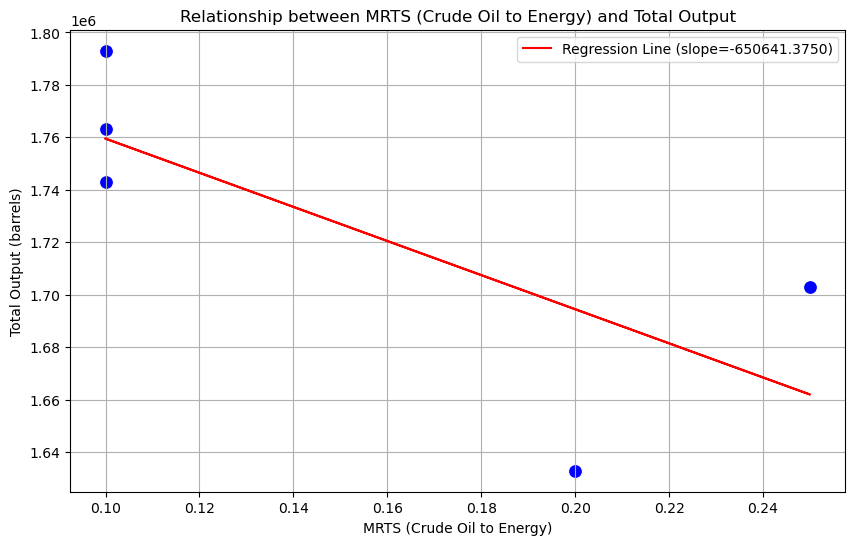

Regression Line: Slope = -650641.3750, Intercept = 1824572.19
R-squared: 0.5514, P-value: 0.1506
Std Error of the Estimate: 338809.0343

The MRTS (Crude Oil to Energy) does not have a statistically significant relationship with Total Output.


In [41]:
# Task 6: Investigating MRTS Trends and Output

from scipy.stats import linregress

# Step 1: Drop rows where either MRTS or Total Output is NaN
df_clean = df[['MRTS_Crude_Energy', 'Total Output (barrels)']].dropna()

# Step 2: Calculate the correlation between MRTS (Crude Oil to Energy) and Total Output
mrt_output_corr = df_clean['MRTS_Crude_Energy'].corr(df_clean['Total Output (barrels)'])
print(f"Correlation between MRTS (Crude Oil to Energy) and Total Output: {mrt_output_corr:.4f}")

# Step 3: Visualize the relationship between MRTS and Total Output using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['MRTS_Crude_Energy'], y=df_clean['Total Output (barrels)'], color='blue', s=100)
plt.title('Relationship between MRTS (Crude Oil to Energy) and Total Output')
plt.xlabel('MRTS (Crude Oil to Energy)')
plt.ylabel('Total Output (barrels)')
plt.grid(True)

# Step 4: Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(df_clean['MRTS_Crude_Energy'], df_clean['Total Output (barrels)'])
plt.plot(df_clean['MRTS_Crude_Energy'], slope * df_clean['MRTS_Crude_Energy'] + intercept, color='red', label=f'Regression Line (slope={slope:.4f})')
plt.legend()
plt.show()

# Step 5: Print regression statistics
print(f"Regression Line: Slope = {slope:.4f}, Intercept = {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}, P-value: {p_value:.4f}")
print(f"Std Error of the Estimate: {std_err:.4f}")

# Interpretation based on regression result
if p_value < 0.05:
    print("\nThe MRTS (Crude Oil to Energy) has a statistically significant relationship with Total Output.")
else:
    print("\nThe MRTS (Crude Oil to Energy) does not have a statistically significant relationship with Total Output.")


In [42]:
# Print interpretation of results

print("### Interpretation of Results:\n")

# Slope
print("1. **Slope**: The slope of the regression line is **-650641.3750**, meaning that for each unit increase in the MRTS (Crude Oil to Energy),")
print("   the total output decreases by about 650,641 barrels. This negative slope suggests that as the marginal rate of technical substitution (MRTS)")
print("   between crude oil and energy increases (i.e., substituting more crude oil for energy), the refinery becomes less efficient in terms of total output.\n")

# Intercept
print("2. **Intercept**: The intercept is **1824572.19**, which represents the total output when MRTS is zero.")
print("   It implies that if no substitution between crude oil and energy occurs, the total output would be approximately 1.82 million barrels.\n")

# R-squared
print("3. **R-squared (0.5514)**: The R-squared value of **0.5514** indicates that approximately **55.14%** of the variation in total output")
print("   can be explained by changes in the MRTS (Crude Oil to Energy). While this is a moderate amount of explanatory power, it is not overwhelmingly strong.\n")

# P-value
print("4. **P-value (0.1506)**: The p-value of **0.1506** is above the conventional significance threshold of 0.05.")
print("   This means that the relationship between MRTS and total output is **not statistically significant**.")
print("   In other words, we cannot confidently say that the MRTS (Crude Oil to Energy) has a meaningful impact on total output based on this analysis.\n")

# Standard Error
print("5. **Standard Error (338809.0343)**: The standard error of the estimate is relatively large, indicating that the prediction errors are substantial,")
print("   which further weakens confidence in the regression model.\n")

# Conclusion
print("### Conclusion:\n")
print("The analysis suggests that the substitution of crude oil for energy (as captured by the MRTS) does not have a statistically significant impact on total output.")
print("The negative slope suggests a decrease in efficiency with increasing MRTS, but the lack of statistical significance means we cannot be confident in this relationship.")
print("Other factors might be influencing total output more than MRTS. Given this, it may be worth exploring additional variables or refining the model to identify key drivers of output.")


### Interpretation of Results:

1. **Slope**: The slope of the regression line is **-650641.3750**, meaning that for each unit increase in the MRTS (Crude Oil to Energy),
   the total output decreases by about 650,641 barrels. This negative slope suggests that as the marginal rate of technical substitution (MRTS)
   between crude oil and energy increases (i.e., substituting more crude oil for energy), the refinery becomes less efficient in terms of total output.

2. **Intercept**: The intercept is **1824572.19**, which represents the total output when MRTS is zero.
   It implies that if no substitution between crude oil and energy occurs, the total output would be approximately 1.82 million barrels.

3. **R-squared (0.5514)**: The R-squared value of **0.5514** indicates that approximately **55.14%** of the variation in total output
   can be explained by changes in the MRTS (Crude Oil to Energy). While this is a moderate amount of explanatory power, it is not overwhelmingly strong.

4.

In [43]:
# Task 7: Cost-Effectiveness Analysis

# Step 1: Calculate the cost-effectiveness of each input
df['Cost_Eff_Crude_Oil'] = df['Crude Oil Cost ($/barrel)'] / df['MP_Crude_Oil']
df['Cost_Eff_Labor'] = df['Labor Cost ($/hour)'] / df['MP_Labor']
df['Cost_Eff_Energy'] = df['Natural Gas Cost ($/MMBtu)'] / df['MP_Energy']

# Step 2: Rank inputs by cost-effectiveness (lower value = more cost-effective)
df['Most_Cost_Effective'] = df[['Cost_Eff_Crude_Oil', 'Cost_Eff_Labor', 'Cost_Eff_Energy']].idxmin(axis=1)

# Step 3: Display the results
print("### Cost-Effectiveness of Inputs (Lower is Better):\n")
print(df[['Month', 'Cost_Eff_Crude_Oil', 'Cost_Eff_Labor', 'Cost_Eff_Energy', 'Most_Cost_Effective']])

# Additional insights
print("\n### Insights:")
print("1. **Most Cost-Effective Input**: For each month, the input with the lowest cost per marginal product is identified.")
print("2. **Crude Oil Cost-Effectiveness**: How does the cost of crude oil relate to its marginal product?")
print("3. **Energy Cost-Effectiveness**: Is energy input providing better returns relative to its cost compared to other inputs?")
print("4. **Labor Cost-Effectiveness**: Does increasing labor costs correlate with lower marginal products of labor?")


### Cost-Effectiveness of Inputs (Lower is Better):

  Month  Cost_Eff_Crude_Oil  Cost_Eff_Labor  Cost_Eff_Energy  \
0   Jan                 NaN             NaN              NaN   
1   Feb          199.634170        3.181670         0.898354   
2   Mar           95.327500        1.557016         0.926039   
3   Apr          111.253823        1.426331         1.265869   
4   May          141.551381        1.731923         0.607838   
5   Jun          136.499909        1.714572         0.599268   

  Most_Cost_Effective  
0                 NaN  
1     Cost_Eff_Energy  
2     Cost_Eff_Energy  
3     Cost_Eff_Energy  
4     Cost_Eff_Energy  
5     Cost_Eff_Energy  

### Insights:
1. **Most Cost-Effective Input**: For each month, the input with the lowest cost per marginal product is identified.
2. **Crude Oil Cost-Effectiveness**: How does the cost of crude oil relate to its marginal product?
3. **Energy Cost-Effectiveness**: Is energy input providing better returns relative to its cost co

In [44]:
# Interpretation printed out
print("### Interpretation:\n")

print("1. **Most Cost-Effective Input**:")
print("   - Across the months from February to June, **energy** consistently appears as the most cost-effective input.")
print("     This means that, relative to its cost, energy inputs yield the highest returns in terms of output compared to labor and crude oil.")
print("   - In January, data is missing, so no conclusions can be drawn for that month.\n")

print("2. **Crude Oil Cost-Effectiveness**:")
print("   - The **cost per marginal product of crude oil** fluctuates across the months, ranging from **95.33** in March to **199.63** in February.")
print("   - Crude oil is much less cost-effective than energy, with significantly higher costs per unit of output.")
print("   - In some months, the cost-effectiveness of crude oil improves (like in March), but it remains consistently more expensive than energy.\n")

print("3. **Energy Cost-Effectiveness**:")
print("   - Energy consistently has the **lowest cost per marginal product**, with values ranging from **0.599** in June to **0.926** in March.")
print("   - This suggests that energy input provides a much better return on investment compared to crude oil and labor, making it a more efficient resource in production.")
print("   - Optimizing energy usage can yield substantial cost savings for Chevron.\n")

print("4. **Labor Cost-Effectiveness**:")
print("   - Labor has a relatively stable cost-effectiveness across the months, with values ranging from **1.426** in April to **3.182** in February.")
print("   - While more cost-effective than crude oil, labor is less efficient than energy.")
print("   - This suggests that labor is moderately cost-effective, but its performance is not as consistently efficient as energy.\n")

print("### Insights:")
print("- **Energy input is consistently the most cost-effective**, suggesting a clear focus on optimizing energy use in the refinery could maximize output at the lowest cost.")
print("- **Crude oil is the least cost-effective input**, with a much higher cost per marginal product, indicating diminishing returns as crude oil costs rise.")
print("- **Labor shows moderate cost-effectiveness**, but its cost-effectiveness does not vary dramatically, implying stable but not exceptional returns relative to its cost.")

### Interpretation:

1. **Most Cost-Effective Input**:
   - Across the months from February to June, **energy** consistently appears as the most cost-effective input.
     This means that, relative to its cost, energy inputs yield the highest returns in terms of output compared to labor and crude oil.
   - In January, data is missing, so no conclusions can be drawn for that month.

2. **Crude Oil Cost-Effectiveness**:
   - The **cost per marginal product of crude oil** fluctuates across the months, ranging from **95.33** in March to **199.63** in February.
   - Crude oil is much less cost-effective than energy, with significantly higher costs per unit of output.
   - In some months, the cost-effectiveness of crude oil improves (like in March), but it remains consistently more expensive than energy.

3. **Energy Cost-Effectiveness**:
   - Energy consistently has the **lowest cost per marginal product**, with values ranging from **0.599** in June to **0.926** in March.
   - This suggests